In [3]:
!pip install numpy scikit-learn pandas seaborn


In [4]:
import sys
!{sys.executable} -m pip install mglearn

In [5]:
import mglearn

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [7]:
print(f"keys = {iris_dataset.keys()}")

keys = dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
X = iris_dataset['data']
y = iris_dataset['target']
print(f"X = {X[:10]}, shape = {X.shape}")
print(f"y = {y[:10]}, shape = {y.shape}")

X = [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]], shape = (150, 4)
y = [0 0 0 0 0 0 0 0 0 0], shape = (150,)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


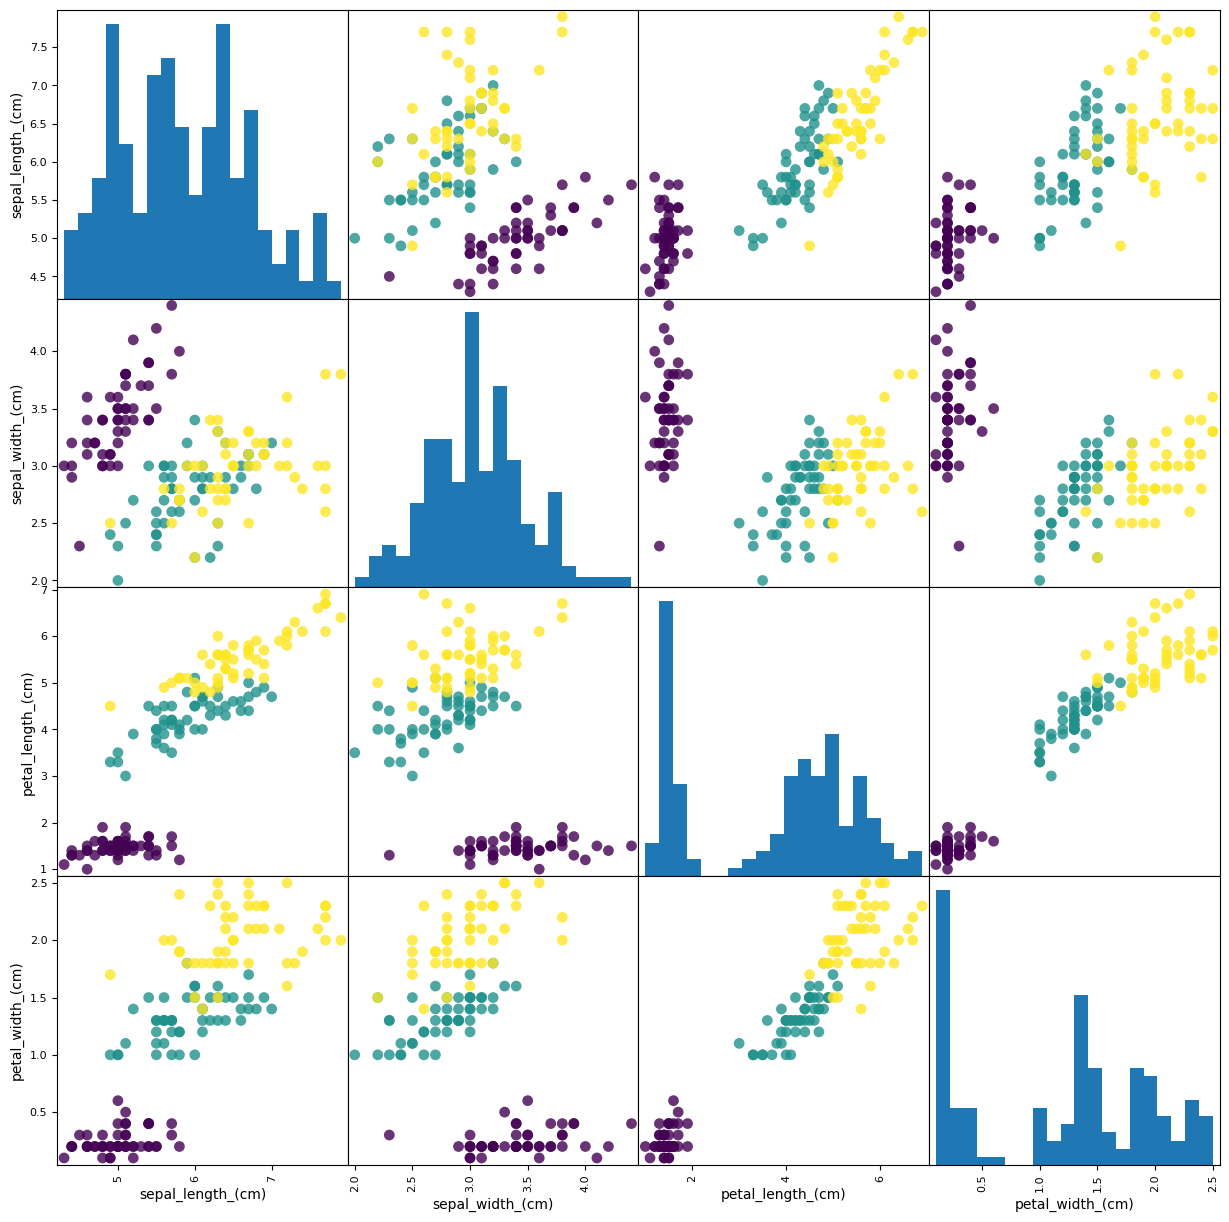

In [11]:
from pandas.plotting import scatter_matrix
#plot some data
X_pd = pd.DataFrame(X,columns = iris_dataset['feature_names'])
X_pd.columns = X_pd.columns.str.replace(' ','_')
display(X_pd)
grr = scatter_matrix(X_pd, c=y, figsize=(15,15), marker='0', hist_kwds={'bins':20},s=60, alpha=0.8)

# K NN code

In [12]:
def scatter_plot_data(X,y, class_names, feature_names,marker='o',colors=[]):
    classes = np.unique(y)
    for i,class_ in enumerate(classes):
        X_class = X[np.where(y==class_)[0],:]
        if len(colors)==0:
            plt.scatter(X_class[:,0], X_class[:,1], marker=marker)
        else:
            plt.scatter(X_class[:,0], X_class[:,1], marker=marker,color = colors[i])
    plt.legend(class_names, loc=4)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])


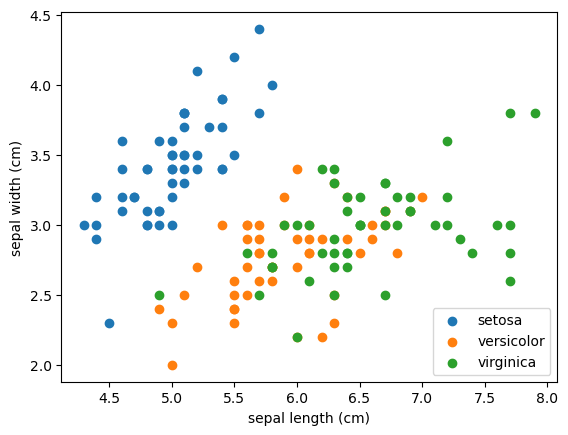

In [13]:
scatter_plot_data(X,y, iris_dataset['target_names'], iris_dataset['feature_names'][:2])

X.shape: (26, 2)


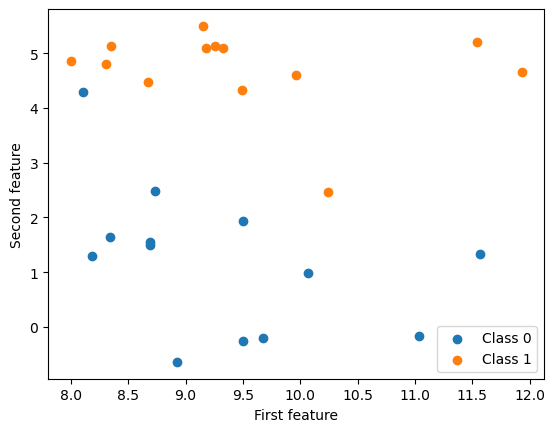

In [30]:
import mglearn
# generate dataset
X, y = mglearn.datasets.make_forge()
X_0 = X[np.where(y==0)[0],:]
X_1 = X[np.where(y==1)[0],:]
X_2 = X[np.where(y==2)[0],:]
# plot dataset
plt.scatter(X_0[:,0], X_0[:,1], marker='o')
plt.scatter(X_1[:,0], X_1[:,1], marker='o')
plt.scatter(X_2[:,0], X_2[:,1], marker='o')
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y, test_size = 0.2, random_state=42)

In [32]:
import heapq
from collections import defaultdict
class KNearestNeighbors:
    def __init__(self, n_neighbors=1):
        self.k = n_neighbors
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X):
        #find distance between X and each point in X_train
        predictions = []
        for x in X:
            distance = []
            min_dist_heap = []
            for i in range(self.X_train.shape[0]):
                dist = 0.0
                for j in range(self.X_train.shape[1]):
                    dist += (self.X_train[i,j]-x[j])**2
                if i<self.k:
                    heapq.heappush(min_dist_heap,(-dist, self.X_train[i].tolist(), self.y_train[i]))
                elif dist>min_dist_heap[0][0]:
#                     print(min_dist_heap)
                    heapq.heappop(min_dist_heap)
                    heapq.heappush(min_dist_heap,(dist, self.X_train[i].tolist(), self.y_train[i]))
            #now iterate through heap, get corresponding y==1 and y==0 counts
            count_map = defaultdict(int)
            for neighbor in min_dist_heap:
                count_map[neighbor[2]]+=1
            # Find the label with the maximum count
            predicted_label = max(count_map.items(), key=lambda item: item[1])[0]
            predictions.append(predicted_label)

        return np.array(predictions)            

In [33]:
X_train.shape[1]

2

In [34]:
X_test.shape

(6, 2)

In [35]:
knn = KNearestNeighbors(n_neighbors=3)
knn.fit(X_train,y_train)
y_brute = knn.predict(X_test)
print(f"brute force knn labels= {y_brute}")

brute force knn labels= [0 0 0 0 1 0]


# vectorized implementation

In [36]:
import heapq
from collections import defaultdict
class KNearestNeighbors:
    def __init__(self, n_neighbors=1):
        self.k = n_neighbors
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X):
        #find distance between X and each point in X_train
        predictions = []
        for x in X:
            distance = []
            min_dist_heap = []
            for i in range(self.X_train.shape[0]):
                dist = np.sum((self.X_train[i]-x)**2)
                if i<self.k:
                    heapq.heappush(min_dist_heap,(-dist, self.X_train[i].tolist(), self.y_train[i]))
                elif dist>min_dist_heap[0][0]:
                    heapq.heappop(min_dist_heap)
                    heapq.heappush(min_dist_heap,(-dist, self.X_train[i].tolist(), self.y_train[i]))
            #now iterate through heap, get corresponding y==1 and y==0 counts
            count_map = defaultdict(int)
            for neighbor in min_dist_heap:
                count_map[neighbor[2]]+=1
            # Find the label with the maximum count
            predicted_label = max(count_map.items(), key=lambda item: item[1])[0]
            predictions.append(predicted_label)
        
        return np.array(predictions)       

In [37]:
knn = KNearestNeighbors(n_neighbors=3)
knn.fit(X_train,y_train)
y_vec1 = knn.predict(X_test)
print(f"brute force knn labels= {y_vec1}")

brute force knn labels= [1 1 1 1 0 1]


# full vectorization with numpy

In [38]:
from collections import defaultdict, Counter
class KNearestNeighbors:
    def __init__(self, n_neighbors=1):
        self.k = n_neighbors
    def fit(self, X_train, y_train):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        predictions = []
        #find distance between X and each point in X_train
        for x in X:
            dist = np.sum((self.X_train-x)**2,axis=1)
            top_k_indices = np.argsort(dist)[:self.k]
            top_k_labels = self.y_train[top_k_indices]
            predicted_label = Counter(top_k_labels).most_common(1)[0][0]
            predictions.append(predicted_label)
        return np.array(predictions)             

In [39]:
knn = KNearestNeighbors(n_neighbors=3)
knn.fit(X_train,y_train)
y_vec_full = knn.predict(X_test)
print(f"brute force knn labels= {y_vec_full}")

brute force knn labels= [1 1 1 1 0 1]


# Vizualization

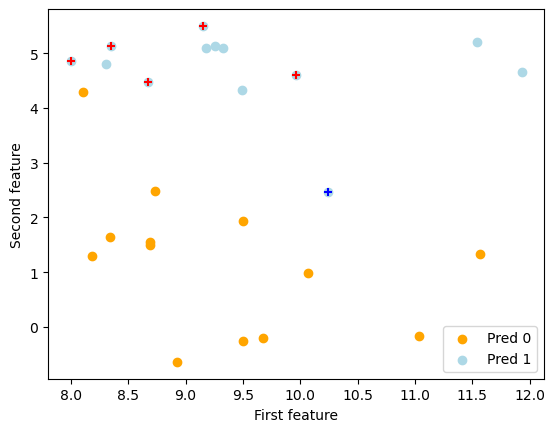

In [40]:
import mglearn
# generate dataset
X, y = mglearn.datasets.make_forge()
X_0 = X[np.where(y==0)[0],:]
X_1 = X[np.where(y==1)[0],:]
# plot dataset
plt.scatter(X_0[:,0], X_0[:,1], marker='o',c='orange')
plt.scatter(X_1[:,0], X_1[:,1], marker='o',c='lightblue')
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
#plot predicted blue as blue+ and predicted orange as red+
X_test_0 = X_test[np.where(y_brute==0)[0],:]
X_test_1 = X_test[np.where(y_brute==1)[0],:]
plt.scatter(X_test_0[:,0], X_test_0[:,1], marker='+',c='red')
plt.scatter(X_test_1[:,0], X_test_1[:,1], marker='+',c='blue')
plt.legend(["Pred 0", "Pred 1"], loc=4)



In [41]:
#accuracy
total_predictions = X_test.shape[0]
correct_predictions = np.sum(y_vec_full==y_test)
accuracy = correct_predictions/total_predictions
print(f"accuracy = {accuracy}")

accuracy = 0.8333333333333334
